In [1]:
import os
import re

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def perf_bench(cpu, size, nr_loops):
    cmd = 'taskset -c {} perf bench mem memcpy -s {} -l {} -c'.format(cpu, size, nr_loops)
    t1 = os.popen(cmd).read()
    #print t1
    return capture_profiling(t1)

In [26]:
def capture_profiling(text):
    reobj = re.compile(r"([\d\.]+) cycles/byte.{16,128}\s{3}([\d\.]+) cycles/byte.{16,128}\s{3}([\d\.]+) cycles/byte.{16,128}\s{3}([\d\.]+) cycles/byte", re.DOTALL | re.MULTILINE)
    match2 = reobj.search(text)
    if match2:
        m1 = float(match2.group(1))
        m2 = float(match2.group(2))
        m3 = float(match2.group(3))
        m4 = float(match2.group(4))
    else:
        m1 = 0.
        m2 = 0.
        m3 = 0.
        m4 = 0.

    return m1, m2, m3 ,m4

In [48]:
def perf_plot(x, y1, y2, y3, y4):
    plt.figure(figsize=(13,7))
    plt.plot(x, y1, 'b',label='default')
    plt.plot(x, y2, 'r',label='unrolled')
    plt.plot(x, y3, 'g',label='movsq-based')
    plt.plot(x, y4, 'y',label='movsb-based')
    plt.grid(True)
    plt.legend(loc=0)
    plt.axis('tight')
    plt.xlabel('Number of loops')
    plt.ylabel('cycles/byte')
    plt.title('Compare the performance of memcpy() implementations by test loop (size= 512 bytes, lower is better)')

In [ ]:
def perf_plotbypercentage(x, y1, y2, y3, y4):
    plt.figure(figsize=(13,7))
    plt.plot(x, y1, 'b',label='default')
    plt.plot(x, y2, 'r',label='unrolled')
    plt.plot(x, y3, 'g',label='movsq-based')
    plt.plot(x, y4, 'y',label='movsb-based')
    plt.grid(True)
    plt.legend(loc=0)
    plt.axis('tight')
    plt.xlabel('Number of loops')
    plt.ylabel('cycles/byte')
    plt.title('Compare the performance of memcpy() implementations by test loop (size= 512 bytes, lower is better)')

In [49]:
def testbyloop(cpu,size, nr_loops):
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for i in range(1,nr_loops):
        m1, m2 ,m3 ,m4 = perf_bench(cpu, size, i)
        print('CPU={},size={},Loops={},m1={},m2={},m3={},m4={}'.format(cpu, size, i, m1, m2, m3,m4))
        x.append(i)
        y1.append(m1)
        y2.append(m2)
        y3.append(m3)
        y4.append(m4)
    perf_plot(x, y1, y2, y3, y4)
    return

CPU=9,size=512,Loops=1,m1=2.875,m2=1.808594,m3=1.802734,m4=1.664062
CPU=9,size=512,Loops=2,m1=1.556641,m2=1.003906,m3=1.018555,m4=0.90625
CPU=9,size=512,Loops=3,m1=0.959635,m2=0.787109,m3=0.78776,m4=0.651693
CPU=9,size=512,Loops=4,m1=0.796875,m2=0.611816,m3=0.640625,m4=0.519531
CPU=9,size=512,Loops=5,m1=0.625781,m2=0.491406,m3=0.552344,m4=0.426172
CPU=9,size=512,Loops=6,m1=0.542318,m2=0.446289,m3=0.507161,m4=0.372396
CPU=9,size=512,Loops=7,m1=0.466239,m2=0.39481,m3=0.465123,m4=0.333147
CPU=9,size=512,Loops=8,m1=0.397949,m2=0.359863,m3=0.440674,m4=0.307617
CPU=9,size=512,Loops=9,m1=0.376953,m2=0.333984,m3=0.42947,m4=0.284722
CPU=9,size=512,Loops=10,m1=0.351367,m2=0.324805,m3=0.409766,m4=0.272266
CPU=9,size=512,Loops=11,m1=0.323153,m2=0.285866,m3=0.383878,m4=0.25
CPU=9,size=512,Loops=12,m1=0.297038,m2=0.27181,m3=0.374512,m4=0.238118
CPU=9,size=512,Loops=13,m1=0.270733,m2=0.272085,m3=0.364032,m4=0.229868
CPU=9,size=512,Loops=14,m1=0.267857,m2=0.249721,m3=0.356027,m4=0.220703
CPU=9,size=51

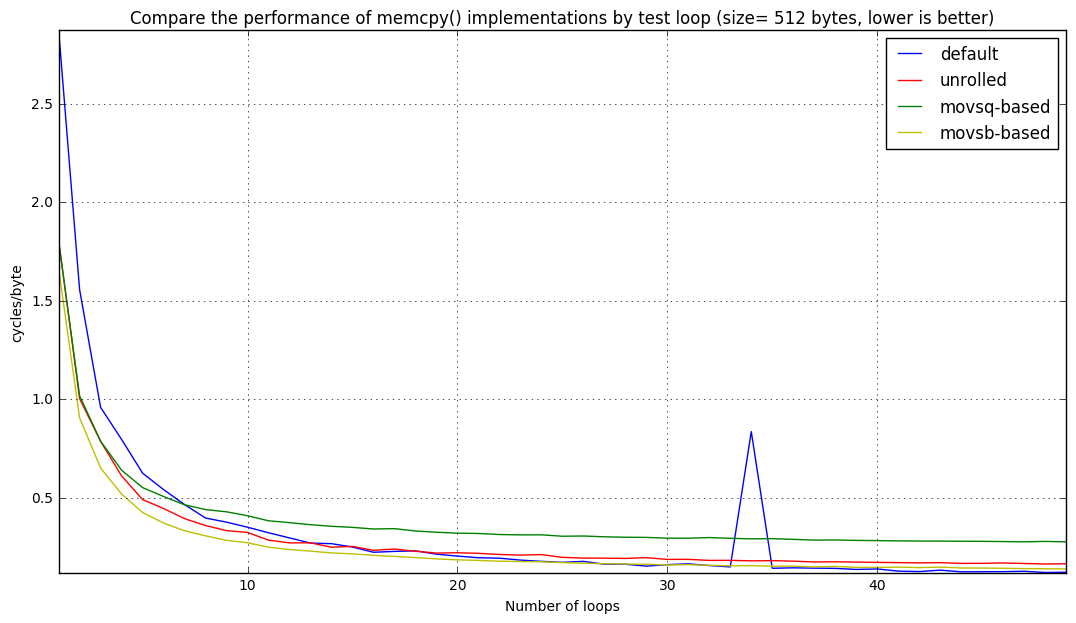

In [47]:
testbyloop(9, 512, 50)